**Treball de Fi de Grau**: Decoding Natural Sounds in "Early" Visual Cortex of Congenitally Blind Individuals.

Jupyter notebook done by Arnau Blanco Borrego.

## Libraries import ##

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import time
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator
pd.set_option('display.max_columns', None)

## Data import ##

#### Data info of directories with results of SVM and SVM-RFE.

In [49]:
dir_svm_runs = ['/Users/blancoarnau/Documents/GitHub/TFG/TFG final/Results/SVM/volume/across_runs/','/Users/blancoarnau/Documents/GitHub/TFG/TFG final/Results/SVM/surface/across_runs/']
dir_svm_blocks = ['/Users/blancoarnau/Documents/GitHub/TFG/TFG final/Results/SVM/volume/across_blocks/','/Users/blancoarnau/Documents/GitHub/TFG/TFG final/Results/SVM/surface/across_blocks/']
dir_svm_rfe = ['/Users/blancoarnau/Documents/GitHub/TFG/TFG final/Results/SVM_RFE/']

#### Return average classification accuracies contained in the .mat files.

In [3]:
def return_accuracies(dir_folder):
    cols = ["Auditory cortex","Motor cortex","EVC"]
    subjs = 8
    accuracies = []
    accuracies_V1V2 = []
    print('Computing accuracies...')
    for i in range(1,subjs+1):
        acc = [];
        if i != 6:
            for j in range(1,4):
                if j == 3:
                    path1 = dir_folder + 'sub-0' + str(i) + '_MainAnalysis_CollapseHem_Patch1_POI' + str(j) + '.mat'
                    path2 = dir_folder + 'sub-0' + str(i) + '_MainAnalysis_CollapseHem_Patch2_POI' + str(j) + '.mat'

                    mat1 = scipy.io.loadmat(path1)
                    mat2 = scipy.io.loadmat(path2)

                    tmp1 = np.mean(mat1['OutObs']['av'][0][0]*100)
                    tmp2 = np.mean(mat2['OutObs']['av'][0][0]*100)
                    
                    tmp = np.mean([tmp1,tmp2])
                    V1V2 = [tmp1,tmp2,np.mean([tmp1,tmp2])]
                    accuracies_V1V2.append(V1V2)

                else:
                    path = dir_folder + 'sub-0' + str(i) + '_MainAnalysis_CollapseHem_Patch1_POI' + str(j) + '.mat'
                    mat = scipy.io.loadmat(path)
                    tmp = np.mean(mat['OutObs']['av'][0][0]*100)
                acc.append(tmp)
            accuracies.append(acc)
    return pd.DataFrame(accuracies,columns=cols), pd.DataFrame(accuracies_V1V2,columns=['V1','V2','V1V2'])

#### Return table with all classification accuracies contained in the .mat files.

In [4]:
def return_table(dir_folder,area,visual):
    accuracies = []
    subjs = 8
    
    # Generate rows
    rows = []
    for i in range(1,subjs+1):
        if i != 6:
            rows.append('Subject ' + str(i))
    
    print('Computing tables...')
    for i in range(1,subjs+1):
        if i != 6:
            if area == 3:

                if visual == 1:
                    path = dir_folder + 'sub-0' + str(i) + '_MainAnalysis_CollapseHem_Patch1_POI' + str(area) + '.mat'
                    mat = scipy.io.loadmat(path)
                    tmp = mat['OutObs']['pc'][0][0].flatten()
                else:
                    path = dir_folder + 'sub-0' + str(i) + '_MainAnalysis_CollapseHem_Patch2_POI' + str(area) + '.mat'
                    mat = scipy.io.loadmat(path)
                    tmp = mat['OutObs']['pc'][0][0].flatten()

                tmp = np.append(tmp,np.mean(tmp))
                accuracies.append(tmp)

            else:
                path = dir_folder + 'sub-0' + str(i) + '_MainAnalysis_CollapseHem_Patch1_POI' + str(area) + '.mat'
                mat = scipy.io.loadmat(path)
                tmp = mat['OutObs']['pc'][0][0].flatten()
                tmp = np.append(tmp,np.mean(tmp))
                accuracies.append(tmp)
                
    # Generate columns
    cols = []
    for i in range(1,len(accuracies[0])+1):
        if i == len(accuracies[0]):
            cols.append('Mean')
        else:
            cols.append('Fold ' + str(i))
    # Return dataframe
    return pd.DataFrame(accuracies,index=rows,columns=cols)

#### Data import of average accuracies of the classification models.

In [5]:
df_svm_runs_vol, df_svm_runs_vol_V1V2 = return_accuracies(dir_svm_runs[0])
df_svm_runs_surf, df_svm_runs_surf_V1V2 = return_accuracies(dir_svm_runs[1])
df_svm_blocks_vol, df_svm_blocks_vol_V1V2 = return_accuracies(dir_svm_blocks[0])
df_svm_blocks_surf, df_svm_blocks_surf_V1V2 = return_accuracies(dir_svm_blocks[1])
df_svm_rfe, df_svm_rfe_V1V2 = return_accuracies(dir_svm_rfe[0])

Computing accuracies...
Computing accuracies...
Computing accuracies...
Computing accuracies...
Computing accuracies...


#### Data import of all accuracies of the classification models.

In [104]:
print('SVM runs volume-based data:')
table_svm_runs_vol1 = return_table(dir_svm_runs[0],1,2)
table_svm_runs_vol1.to_excel('table_svm_runs_vol1.xlsx',sheet_name='table_svm_runs_vol1')  
table_svm_runs_vol2 = return_table(dir_svm_runs[0],2,2)
table_svm_runs_vol2.to_excel('table_svm_runs_vol2.xlsx',sheet_name='table_svm_runs_vol2')  
table_svm_runs_vol31 = return_table(dir_svm_runs[0],3,1)
table_svm_runs_vol31.to_excel('table_svm_runs_vol31.xlsx',sheet_name='table_svm_runs_vol31')  
table_svm_runs_vol32 = return_table(dir_svm_runs[0],2,2)
table_svm_runs_vol32.to_excel('table_svm_runs_vol32.xlsx',sheet_name='table_svm_runs_vol32')  

print('SVM runs surface-based data:')
table_svm_runs_surf1 = return_table(dir_svm_runs[1],1,2)
table_svm_runs_surf1.to_excel('table_svm_runs_surf1.xlsx',sheet_name='table_svm_runs_surf1')  
table_svm_runs_surf2 = return_table(dir_svm_runs[1],2,2)
table_svm_runs_surf2.to_excel('table_svm_runs_surf2.xlsx',sheet_name='table_svm_runs_surf2')  
table_svm_runs_surf31 = return_table(dir_svm_runs[1],3,1)
table_svm_runs_surf31.to_excel('table_svm_runs_surf31.xlsx',sheet_name='table_svm_runs_surf31')  
table_svm_runs_surf32 = return_table(dir_svm_runs[1],3,2)
table_svm_runs_surf32.to_excel('table_svm_runs_surf32.xlsx',sheet_name='table_svm_runs_surf32')  

print('SVM blocks volume-based data:')
table_svm_blocks_vol1 = return_table(dir_svm_blocks[0],1,2)
table_svm_blocks_vol1.to_excel('table_svm_blocks_vol1.xlsx',sheet_name='table_svm_blocks_vol1')  
table_svm_blocks_vol2 = return_table(dir_svm_blocks[0],2,2)
table_svm_blocks_vol2.to_excel('table_svm_blocks_vol2.xlsx',sheet_name='table_svm_blocks_vol2')
table_svm_blocks_vol31 = return_table(dir_svm_blocks[0],3,1)
table_svm_blocks_vol31.to_excel('table_svm_blocks_vol31.xlsx',sheet_name='table_svm_blocks_vol31')  
table_svm_blocks_vol32 = return_table(dir_svm_blocks[0],3,2)
table_svm_blocks_vol32.to_excel('table_svm_blocks_vol32.xlsx',sheet_name='table_svm_blocks_vol32')  

print('SVM blocks surface-based data:')
table_svm_blocks_surf1 = return_table(dir_svm_blocks[1],1,2)
table_svm_blocks_surf1.to_excel('table_svm_blocks_surf1.xlsx',sheet_name='table_svm_blocks_surf1')  
table_svm_blocks_surf2 = return_table(dir_svm_blocks[1],2,2)
table_svm_blocks_surf2.to_excel('table_svm_blocks_surf2.xlsx',sheet_name='table_svm_blocks_surf2')  
table_svm_blocks_surf31 = return_table(dir_svm_blocks[1],3,1)
table_svm_blocks_surf31.to_excel('table_svm_blocks_surf31.xlsx',sheet_name='table_svm_blocks_surf31')
table_svm_blocks_surf32 = return_table(dir_svm_blocks[1],3,2)
table_svm_blocks_surf32.to_excel('table_svm_blocks_surf1.xlsx',sheet_name='table_svm_blocks_surf32')  

print('SVM-RFE:')
table_svm_rfe1 = return_table(dir_svm_rfe[0],1,2)
table_svm_rfe1.to_excel('table_svm_rfe1.xlsx',sheet_name='table_svm_rfe1')  
table_svm_rfe2 = return_table(dir_svm_rfe[0],2,2)
table_svm_rfe2.to_excel('table_svm_rfe2.xlsx',sheet_name='table_svm_rfe2')  
table_svm_rfe31 = return_table(dir_svm_rfe[0],3,1)
table_svm_rfe31.to_excel('table_svm_rfe31.xlsx',sheet_name='table_svm_rfe31')  
table_svm_rfe32 = return_table(dir_svm_rfe[0],3,2)
table_svm_rfe32.to_excel('table_svm_rfe32.xlsx',sheet_name='table_svm_rfe32')  

SVM runs volume-based data:
Computing tables...
Computing tables...
Computing tables...
Computing tables...
SVM runs surface-based data:
Computing tables...
Computing tables...
Computing tables...
Computing tables...
SVM blocks volume-based data:
Computing tables...
Computing tables...
Computing tables...
Computing tables...
SVM blocks surface-based data:
Computing tables...
Computing tables...
Computing tables...
Computing tables...
SVM-RFE:
Computing tables...
Computing tables...
Computing tables...
Computing tables...


## Data visualization ##

### Overall accuracy

#### Bar plots of SVM for volume-based data.

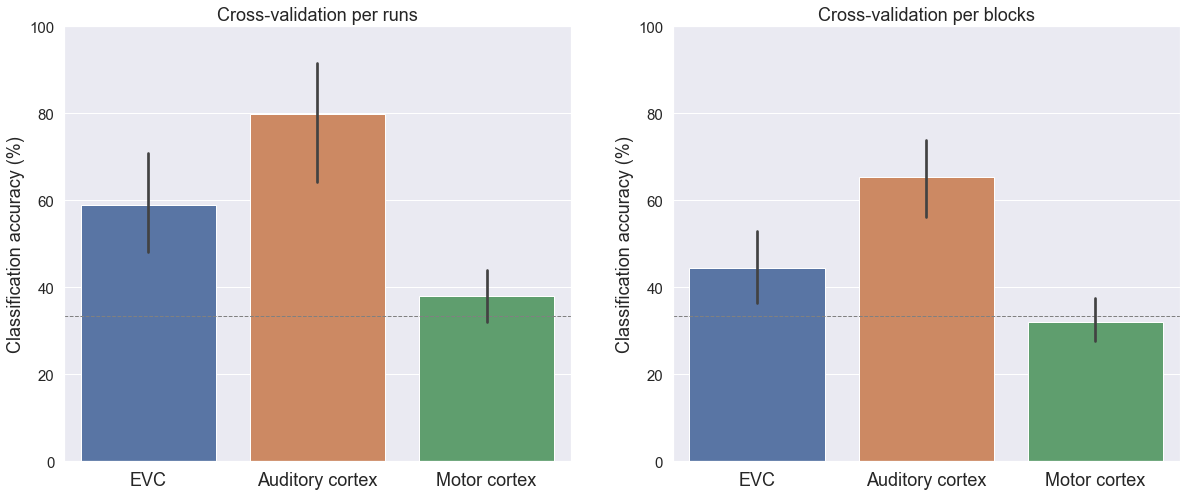

In [7]:
sns.set()
baseline = 100/3
order_set = ["EVC","Auditory cortex","Motor cortex"]

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.ylim(0, 100)
plt.title('Cross-validation per runs',fontsize=18)
plt.ylabel('Classification accuracy (%)',fontsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.axhline(baseline, ls='--', lw=1, color="gray")
sns.barplot(data=df_svm_runs_vol,order=order_set)
plt.tick_params(axis='x', labelsize=18)

plt.subplot(1,2,2)
plt.title('Cross-validation per blocks',fontsize=18)
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.ylabel('Classification accuracy (%)',fontsize=18)
plt.ylim(0, 100)
sns.barplot(data=df_svm_blocks_vol,order=order_set)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.show()

#### Bar plots of SVM for surface-based data (runs vs blocks).

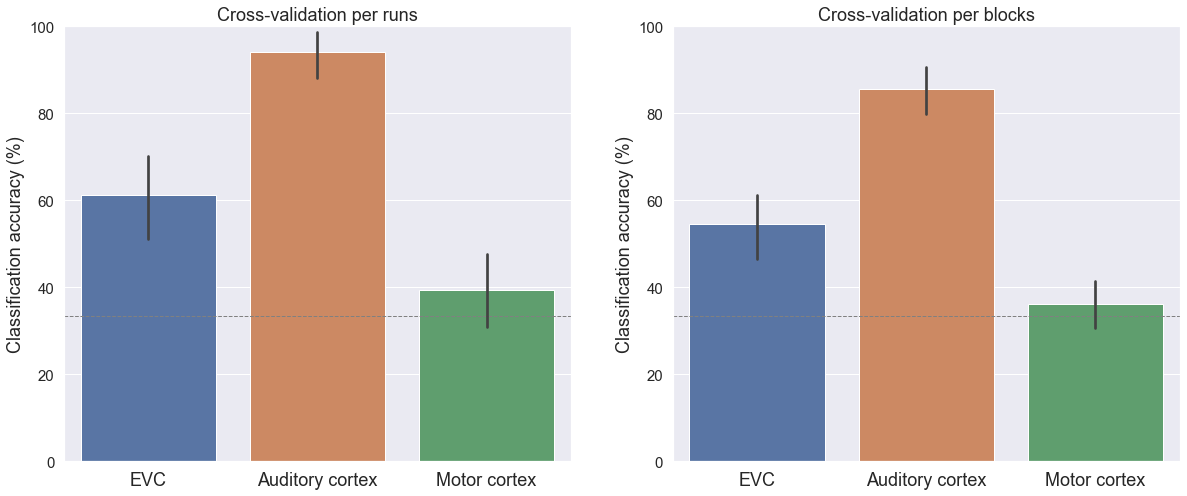

In [8]:
baseline = 100/3
order_set = ["EVC","Auditory cortex","Motor cortex"]

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.ylim(0, 100)
plt.title('Cross-validation per runs',fontsize=18)
plt.ylabel('Classification accuracy (%)',fontsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.axhline(baseline, ls='--', lw=1, color="gray")
sns.barplot(data=df_svm_runs_surf,order=order_set)
plt.tick_params(axis='x', labelsize=18)

plt.subplot(1,2,2)
plt.title('Cross-validation per blocks',fontsize=18)
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.ylabel('Classification accuracy (%)',fontsize=18)
plt.ylim(0, 100)
sns.barplot(data=df_svm_blocks_surf,order=order_set)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.show()

#### Bar plots of SVM for surface-based data (across runs).

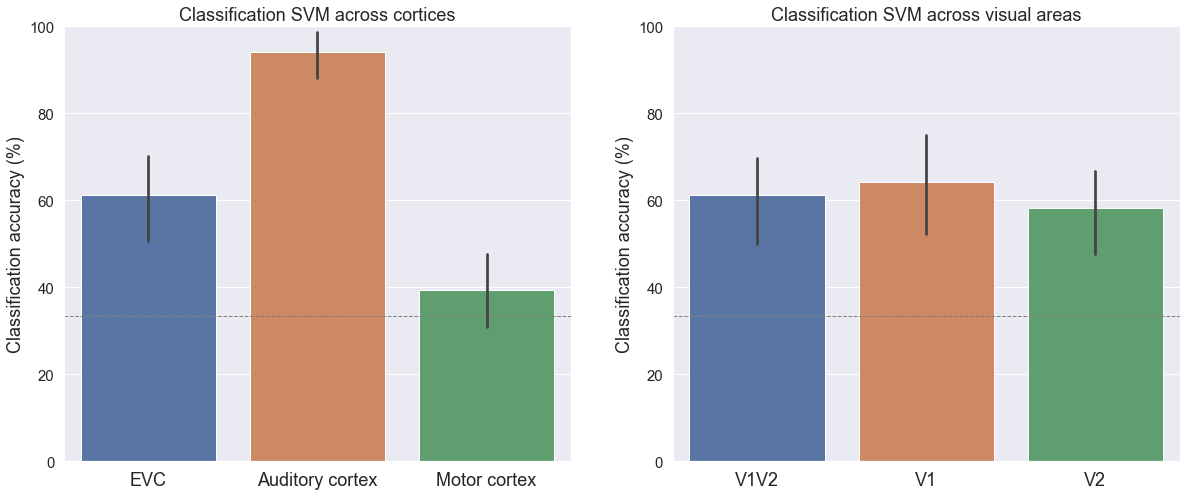

In [9]:
baseline = 100/3
order_set = ["EVC","Auditory cortex","Motor cortex"]

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Classification SVM across cortices',fontsize=18)
plt.ylim(0, 100)
plt.ylabel('Classification accuracy (%)',fontsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.axhline(baseline, ls='--', lw=1, color="gray")
sns.barplot(data=df_svm_runs_surf,order=order_set)
plt.tick_params(axis='x', labelsize=18)

plt.subplot(1,2,2)
plt.title('Classification SVM across visual areas',fontsize=18)
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.ylabel('Classification accuracy (%)',fontsize=18)
plt.ylim(0, 100)
sns.barplot(data=df_svm_runs_surf_V1V2,order=["V1V2","V1","V2"])
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.show()

#### Bar plots of SVM for surface-based data (across blocks).

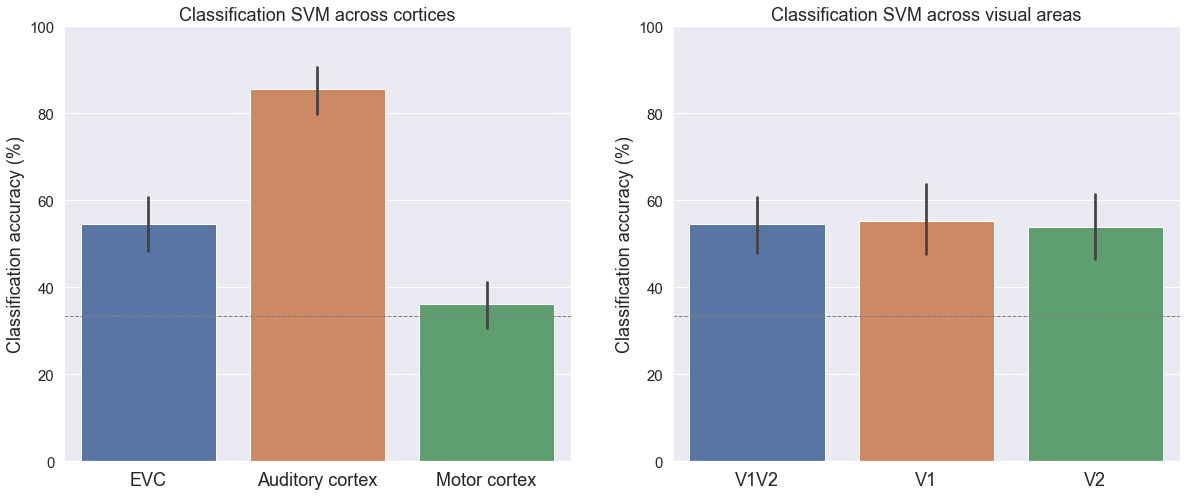

In [10]:
baseline = 100/3
order_set = ["EVC","Auditory cortex","Motor cortex"]

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Classification SVM across cortices',fontsize=18)
plt.ylim(0, 100)
plt.ylabel('Classification accuracy (%)',fontsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.axhline(baseline, ls='--', lw=1, color="gray")
sns.barplot(data=df_svm_blocks_surf,order=order_set)
plt.tick_params(axis='x', labelsize=18)

plt.subplot(1,2,2)
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.title('Classification SVM across visual areas',fontsize=18)
plt.ylabel('Classification accuracy (%)',fontsize=18)
plt.ylim(0, 100)
sns.barplot(data=df_svm_blocks_surf_V1V2,order=["V1V2","V1","V2"])
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.show()

### Accuracy per subject

#### Line plot of SVM for volume-based data (across runs and blocks).

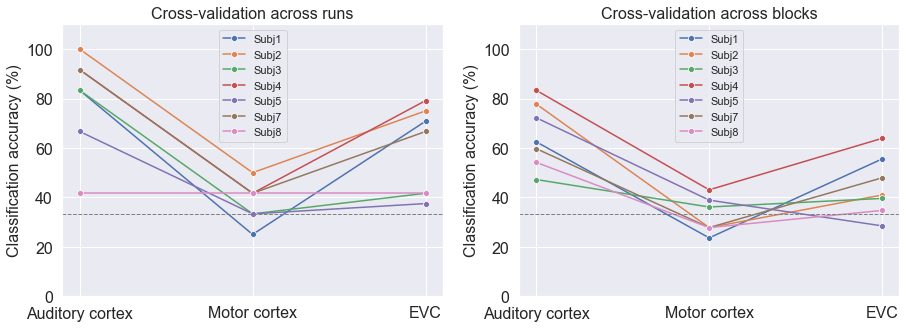

In [11]:
sns.set()
tags = ['Subj1','Subj2','Subj3','Subj4','Subj5','Subj7','Subj8']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylim([0, 110])
plt.title('Cross-validation across runs',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
for i in range(0,len(df_svm_runs_vol)):
    sns.lineplot(data=df_svm_runs_vol.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.subplot(1,2,2)
plt.title('Cross-validation across blocks',fontsize=16)
plt.ylim([0, 110])
plt.ylabel('Classification accuracy (%)',fontsize=16)
for i in range(0,len(df_svm_runs_vol)):
    sns.lineplot(data=df_svm_blocks_vol.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()

#### Line plot of SVM per subject for surface-based data (across runs and blocks).

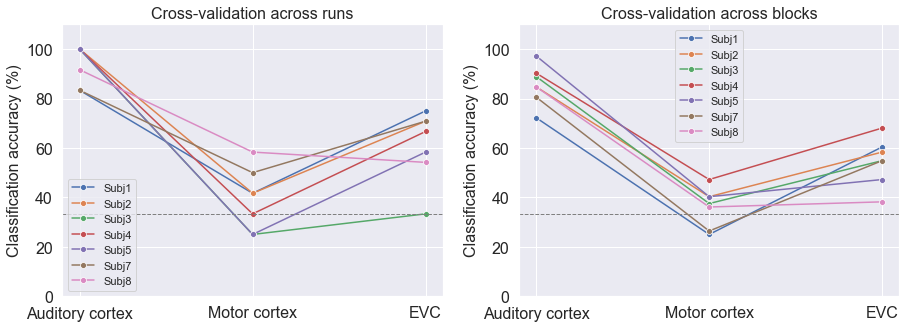

In [12]:
tags = ['Subj1','Subj2','Subj3','Subj4','Subj5','Subj7','Subj8']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylim([0, 110])
plt.title('Cross-validation across runs',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
for i in range(0,len(df_svm_runs_surf)):
    sns.lineplot(data=df_svm_runs_surf.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.subplot(1,2,2)
plt.title('Cross-validation across blocks',fontsize=16)
plt.ylim([0, 110])
plt.ylabel('Classification accuracy (%)',fontsize=16)
for i in range(0,len(df_svm_runs_surf)):
    sns.lineplot(data=df_svm_blocks_surf.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()

#### Line plot of SVM per subject for surface-based data (across blocks).

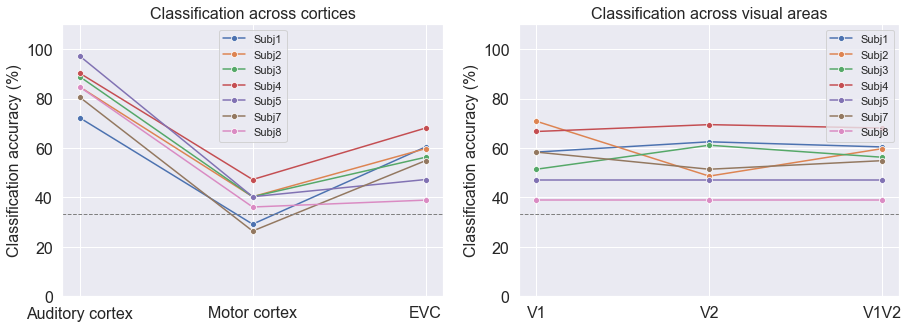

In [13]:
tags = ['Subj1','Subj2','Subj3','Subj4','Subj5','Subj7','Subj8']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylim([0, 110])
plt.title('Classification across cortices',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
for i in range(0,len(df_svm_rfe)):
    sns.lineplot(data=df_svm_rfe.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.subplot(1,2,2)
plt.ylim([0, 110])
plt.title('Classification across visual areas',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
for i in range(0,len(df_svm_rfe_V1V2)):
    sns.lineplot(data=df_svm_rfe_V1V2.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()

#### Line plot of SVM per subject for surface-based data (across blocks).

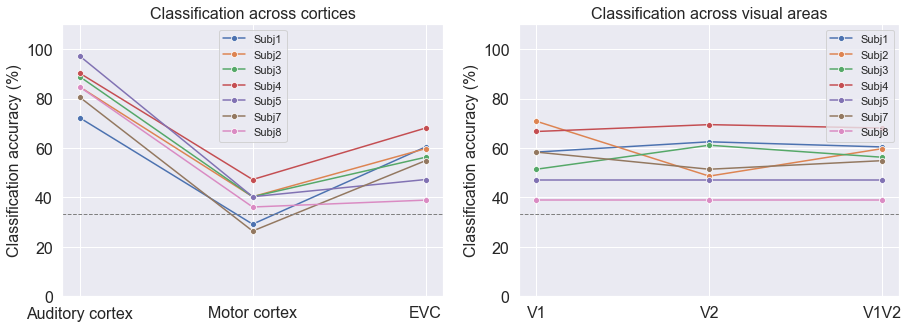

In [14]:
tags = ['Subj1','Subj2','Subj3','Subj4','Subj5','Subj7','Subj8']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylim([0, 110])
plt.title('Classification across cortices',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
for i in range(0,len(df_svm_rfe)):
    sns.lineplot(data=df_svm_rfe.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.subplot(1,2,2)
plt.ylim([0, 110])
plt.title('Classification across visual areas',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
for i in range(0,len(df_svm_rfe_V1V2)):
    sns.lineplot(data=df_svm_rfe_V1V2.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()

#### Line plot of SVM-RFE per subject across cortices for surface-based data.

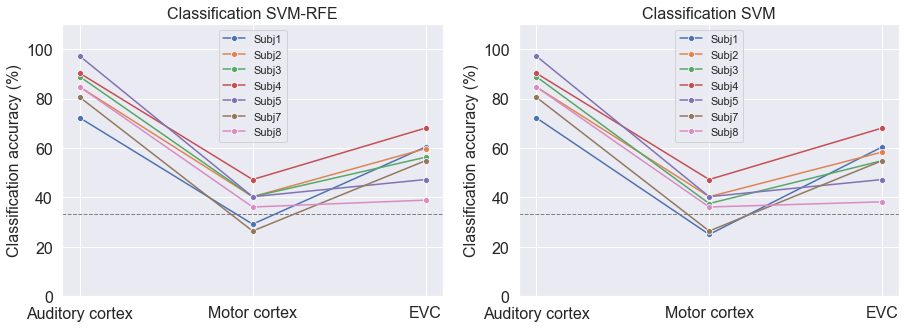

In [15]:
tags = ['Subj1','Subj2','Subj3','Subj4','Subj5','Subj7','Subj8']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylim([0, 110])
plt.title('Classification SVM-RFE',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
for i in range(0,len(df_svm_rfe)):
    sns.lineplot(data=df_svm_rfe.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.subplot(1,2,2)
plt.ylim([0, 110])
plt.title('Classification SVM',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
for i in range(0,len(df_svm_blocks_surf)):
    sns.lineplot(data=df_svm_blocks_surf.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()

In [16]:
df_svm_rfe

,Auditory cortex,Motor cortex,EVC
0,72.222222,29.166667,60.416667
1,84.722222,40.277778,59.722222
2,88.888889,40.277778,56.250000
3,90.277778,47.222222,68.055556
4,97.222222,40.277778,47.222222
5,80.555556,26.388889,54.861111
6,84.722222,36.111111,38.888889


In [17]:
df_svm_blocks_surf

,Auditory cortex,Motor cortex,EVC
0,72.222222,25.000000,60.416667
1,84.722222,40.277778,58.333333
2,88.888889,37.500000,54.861111
3,90.277778,47.222222,68.055556
4,97.222222,40.277778,47.222222
5,80.555556,26.388889,54.861111
6,84.722222,36.111111,38.194444


#### Line plot of SVM-RFE per subject across visual areas for surface-based data.

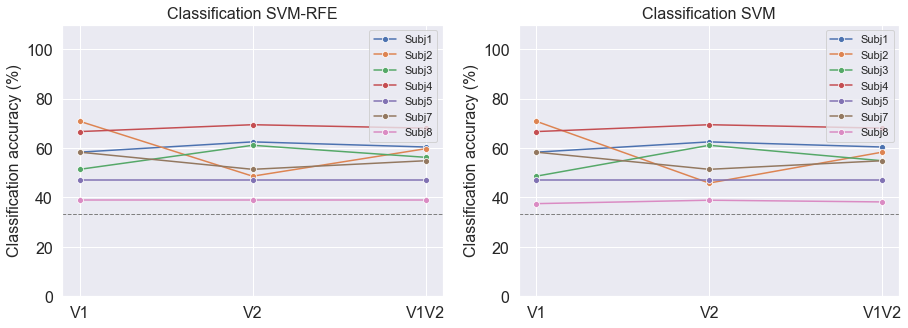

In [18]:
tags = ['Subj1','Subj2','Subj3','Subj4','Subj5','Subj7','Subj8']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylim([0, 110])
plt.title('Classification SVM-RFE',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
for i in range(0,len(df_svm_rfe_V1V2)):
    sns.lineplot(data=df_svm_rfe_V1V2.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.subplot(1,2,2)
plt.ylim([0, 110])
plt.title('Classification SVM',fontsize=16)
plt.ylabel('Classification accuracy (%)',fontsize=16)
for i in range(0,len(df_svm_blocks_surf_V1V2)):
    sns.lineplot(data=df_svm_blocks_surf_V1V2.iloc[i],marker="o",label=tags[i])
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()

In [19]:
df_svm_blocks_surf_V1V2

,V1,V2,V1V2
0,58.333333,62.500000,60.416667
1,70.833333,45.833333,58.333333
2,48.611111,61.111111,54.861111
3,66.666667,69.444444,68.055556
4,47.222222,47.222222,47.222222
5,58.333333,51.388889,54.861111
6,37.500000,38.888889,38.194444


In [20]:
df_svm_rfe_V1V2

,V1,V2,V1V2
0,58.333333,62.500000,60.416667
1,70.833333,48.611111,59.722222
2,51.388889,61.111111,56.250000
3,66.666667,69.444444,68.055556
4,47.222222,47.222222,47.222222
5,58.333333,51.388889,54.861111
6,38.888889,38.888889,38.888889


#### Accuracy for SVM-RFE

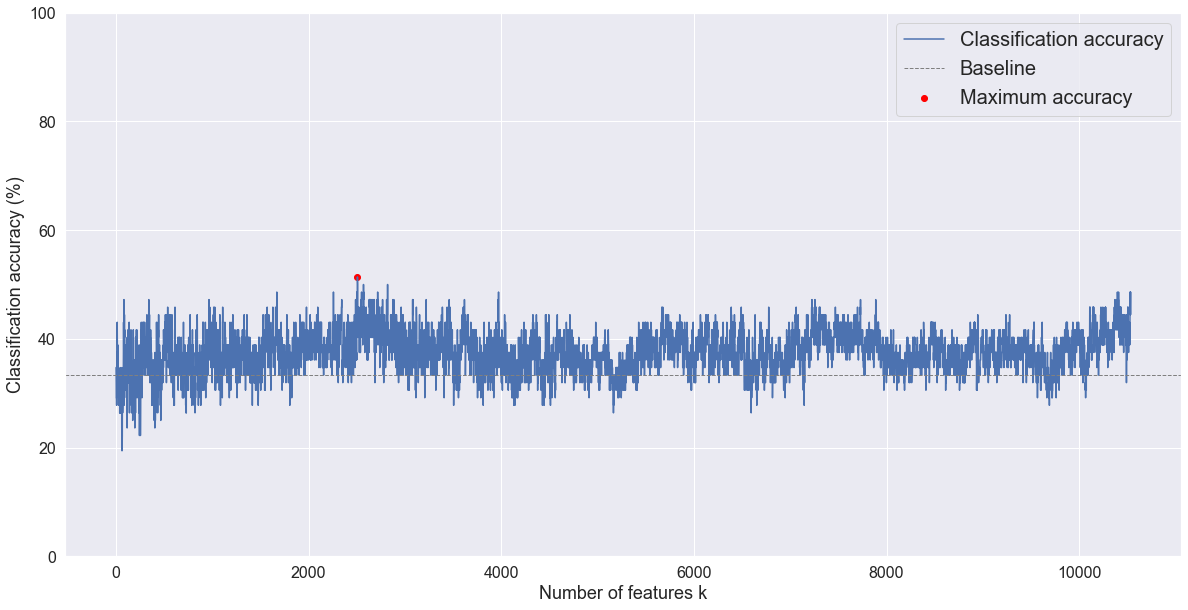

In [21]:
acc = scipy.io.loadmat('/Users/blancoarnau/Desktop/accuracy.mat')
plt.figure(figsize=(20,10))
plt.plot(100*acc['acc_avg'])
plt.scatter(np.argmax(acc['acc_avg']),100*np.max(acc['acc_avg']),color='red')
plt.axhline(baseline, ls='--', lw=1, color="gray")
plt.ylabel('Classification accuracy (%)',fontsize=18)
plt.xlabel('Number of features k',fontsize=18)
plt.legend(['Classification accuracy','Baseline','Maximum accuracy'],prop={'size': 20})
plt.ylim(0,100)
plt.tick_params(labelsize=16)
plt.show()

#### BOLD signals: non-preprocessed vs preprocessed

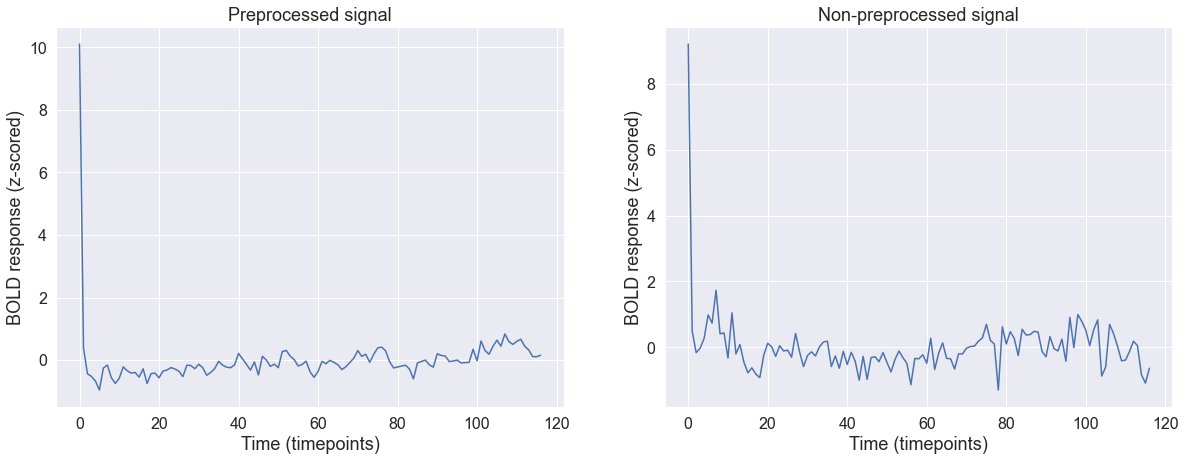

In [22]:
signal = scipy.io.loadmat('/Users/blancoarnau/Desktop/signal.mat')
signal_np = scipy.io.loadmat('/Users/blancoarnau/Desktop/signal_nop.mat')
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Preprocessed signal',fontsize=18)
plt.xlabel('Time (timepoints)',fontsize=18)
plt.ylabel('BOLD response (z-scored)',fontsize=18)
plt.plot(signal['signal_z'].flatten())
plt.tick_params(labelsize=16)
plt.subplot(1,2,2)
plt.title('Non-preprocessed signal',fontsize=18)
plt.plot(signal_np['signal_z'].flatten())
plt.ylabel('BOLD response (z-scored)',fontsize=18)
plt.xlabel('Time (timepoints)',fontsize=18)
plt.tick_params(labelsize=16)
plt.show()

#### Cut BOLD signal vs uncut original BOLD signal

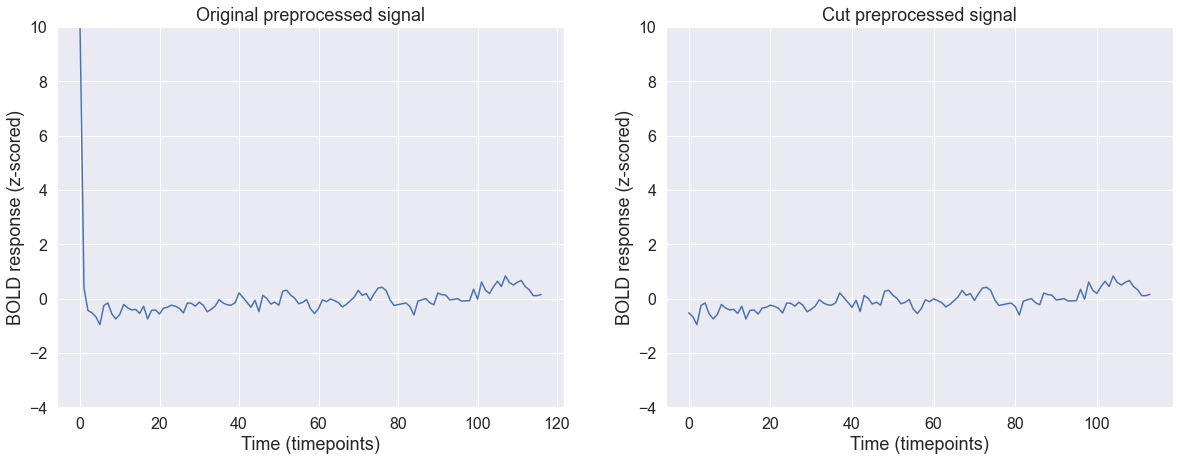

In [23]:
signal = scipy.io.loadmat('/Users/blancoarnau/Desktop/signal.mat')
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Original preprocessed signal',fontsize=18)
plt.xlabel('Time (timepoints)',fontsize=18)
plt.ylabel('BOLD response (z-scored)',fontsize=18)
plt.ylim(-4,10)
plt.plot(signal['signal_z'].flatten())
plt.tick_params(labelsize=16)
plt.subplot(1,2,2)
plt.title('Cut preprocessed signal',fontsize=18)
plt.plot(signal['signal_cut_z'].flatten())
plt.ylabel('BOLD response (z-scored)',fontsize=18)
plt.xlabel('Time (timepoints)',fontsize=18)
plt.tick_params(labelsize=16)
plt.ylim(-4,10)
plt.show()

#### Haemodynamic response (HDR) function

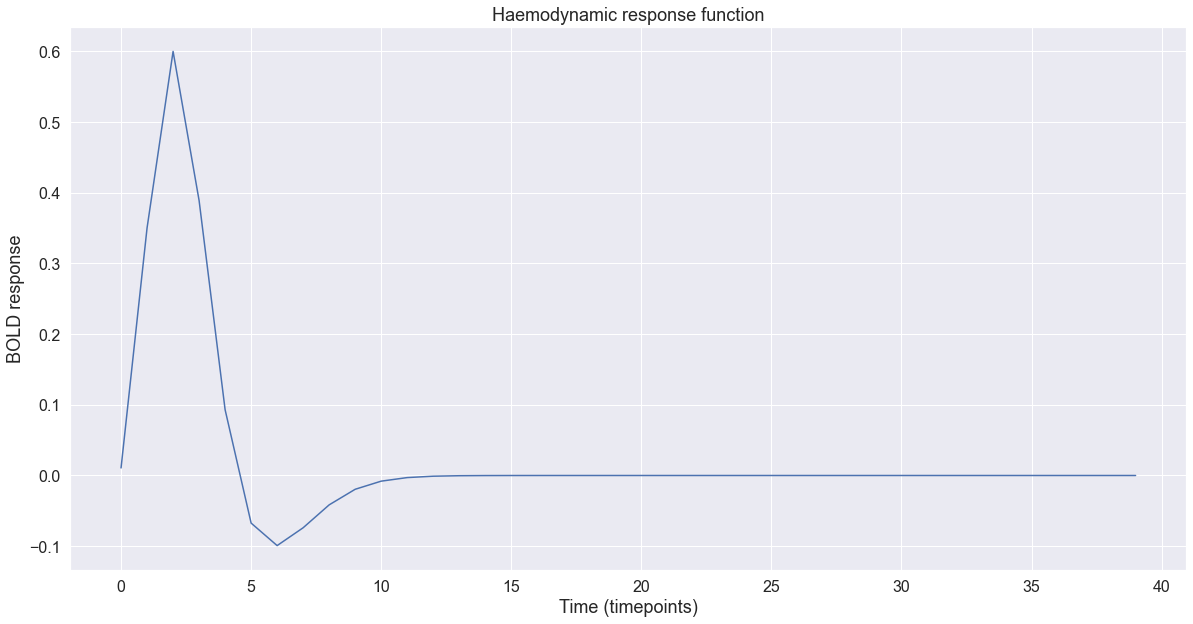

In [24]:
plt.figure(figsize=(20,10))
hdr = scipy.io.loadmat('/Users/blancoarnau/Desktop/hdr.mat')
plt.title('Haemodynamic response function',fontsize=18)
plt.xlabel('Time (timepoints)',fontsize=18)
plt.ylabel('BOLD response',fontsize=18)
plt.plot(hdr['h'].flatten()[0:40])
plt.tick_params(labelsize=16)
plt.show()

#### Beta values and signal approximation with GLM

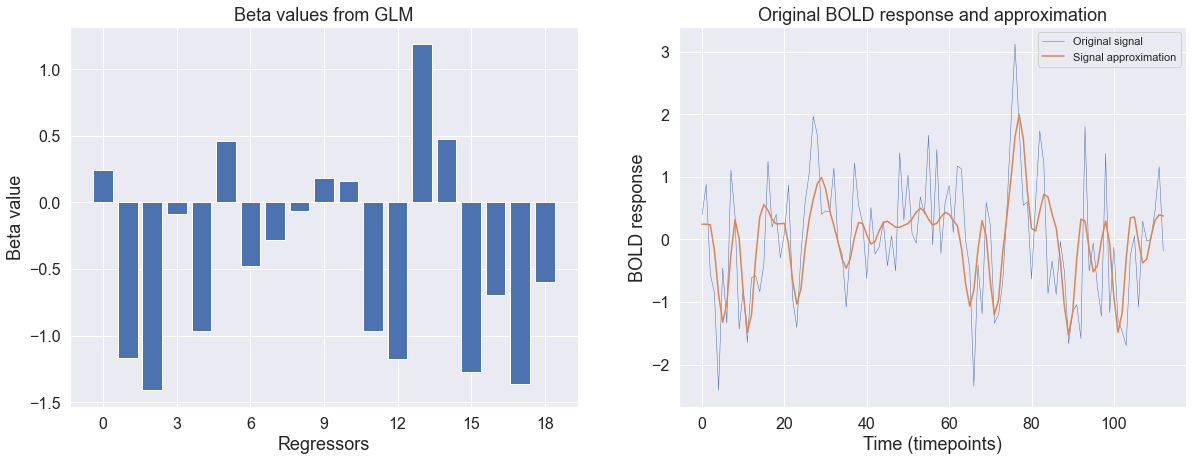

In [25]:
betas = scipy.io.loadmat('/Users/blancoarnau/Desktop/betas.mat')
plt.figure(figsize=(20,7))
ax = plt.subplot(1,2,1)
plt.title('Beta values from GLM',fontsize=18)
plt.xlabel('Regressors',fontsize=18)
plt.ylabel('Beta value',fontsize=18)
plt.bar(np.arange(0,19),betas['B'].flatten())
plt.tick_params(labelsize=16)
xa = ax.get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True))
plt.subplot(1,2,2)
plt.title('Original BOLD response and approximation',fontsize=18)
plt.xlabel('Time (timepoints)',fontsize=18)
plt.ylabel('BOLD response',fontsize=18)
plt.plot(betas['data_tmp'].flatten(),linewidth=0.5)
plt.plot(betas['matmul'].flatten())
plt.tick_params(labelsize=16)
plt.legend(['Original signal','Signal approximation'])
plt.show()

#### Design matrix with and without convolution.

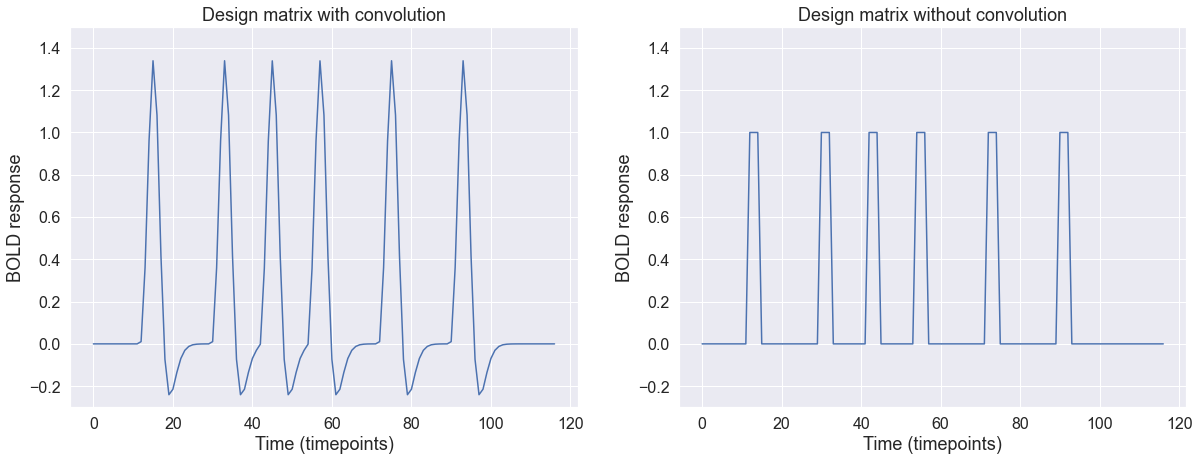

In [26]:
dm = scipy.io.loadmat('/Users/blancoarnau/Desktop/DM.mat')
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Design matrix with convolution',fontsize=18)
plt.xlabel('Time (timepoints)',fontsize=18)
plt.ylabel('BOLD response',fontsize=18)
plt.plot(dm['DM_wo_conv'].flatten())
plt.ylim(-0.3,1.5)
plt.tick_params(labelsize=16)
plt.subplot(1,2,2)
plt.title('Design matrix without convolution',fontsize=18)
plt.xlabel('Time (timepoints)',fontsize=18)
plt.ylabel('BOLD response',fontsize=18)
plt.plot(dm['DM_w_conv'].flatten())
plt.ylim(-0.3,1.5)
plt.tick_params(labelsize=16)
plt.show()

#### Design matrices condition-wise and block-wise.

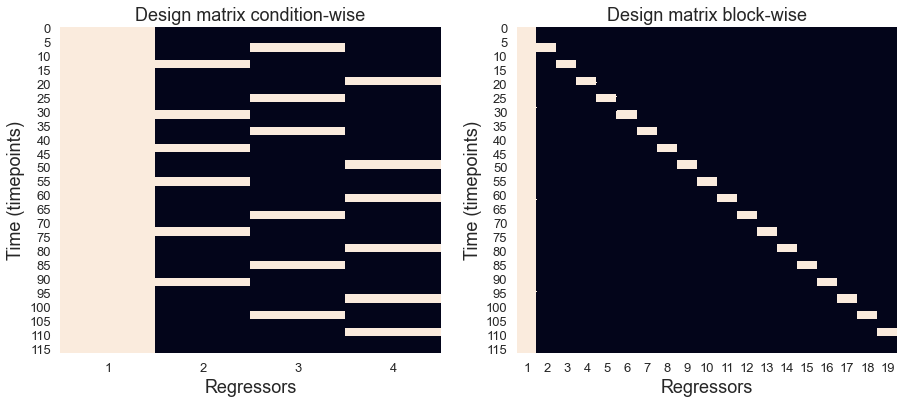

In [27]:
dm = scipy.io.loadmat('/Users/blancoarnau/Desktop/DM_block_cond.mat')
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(dm['dm_cond'],cbar=False,xticklabels=np.arange(1,5))
plt.title('Design matrix condition-wise',fontsize=18)
plt.ylabel('Time (timepoints)',fontsize=18)
plt.xlabel('Regressors',fontsize=18)
plt.tick_params(labelsize=13)
plt.subplot(1,2,2)
sns.heatmap(dm['dm_block'],cbar=False,xticklabels=np.arange(1,20))
plt.title('Design matrix block-wise',fontsize=18)
plt.ylabel('Time (timepoints)',fontsize=18)
plt.xlabel('Regressors',fontsize=18)
plt.tick_params(labelsize=13)
plt.show()

#### Visualization of all tables

SVM runs volume-based data (auditory cortex).

In [103]:
display(table_svm_runs_vol1)

,Fold 1,Fold 2,Fold 3,Fold 4,Mean
Subject 1,0.666667,0.555556,0.666667,0.722222,0.652778
Subject 2,0.888889,0.722222,0.777778,0.833333,0.805556
Subject 3,0.611111,0.611111,0.388889,0.555556,0.541667
Subject 4,0.888889,0.611111,0.666667,0.777778,0.736111
Subject 5,0.333333,0.388889,0.777778,0.722222,0.555556
Subject 7,0.722222,0.722222,0.722222,0.611111,0.694444
Subject 8,0.333333,0.277778,0.388889,0.611111,0.402778


SVM runs volume-based data (motor cortex).

In [83]:
display(table_svm_runs_vol2)

,Fold 1,Fold 2,Fold 3,Fold 4,Mean
Subject 1,0.333333,0.388889,0.333333,0.555556,0.402778
Subject 2,0.444444,0.555556,0.333333,0.333333,0.416667
Subject 3,0.388889,0.500000,0.333333,0.222222,0.361111
Subject 4,0.222222,0.333333,0.444444,0.333333,0.333333
Subject 5,0.333333,0.388889,0.222222,0.500000,0.361111
Subject 7,0.277778,0.388889,0.388889,0.222222,0.319444
Subject 8,0.555556,0.222222,0.444444,0.500000,0.430556


SVM runs volume-based data (EVC - V1).

In [82]:
display(table_svm_runs_vol31)

,Fold 1,Fold 2,Fold 3,Fold 4,Mean
Subject 1,0.777778,0.222222,0.388889,0.388889,0.444444
Subject 2,0.611111,0.555556,0.666667,0.444444,0.569444
Subject 3,0.222222,0.500000,0.388889,0.444444,0.388889
Subject 4,0.611111,0.611111,0.555556,0.388889,0.541667
Subject 5,0.333333,0.333333,0.444444,0.388889,0.375000
Subject 7,0.388889,0.555556,0.611111,0.500000,0.513889
Subject 8,0.333333,0.166667,0.333333,0.222222,0.263889


SVM runs volume-based data (EVC - V2).

In [81]:
display(table_svm_runs_vol32)

,Fold 1,Fold 2,Fold 3,Fold 4,Mean
Subject 1,0.333333,0.388889,0.333333,0.555556,0.402778
Subject 2,0.444444,0.555556,0.333333,0.333333,0.416667
Subject 3,0.388889,0.500000,0.333333,0.222222,0.361111
Subject 4,0.222222,0.333333,0.444444,0.333333,0.333333
Subject 5,0.333333,0.388889,0.222222,0.500000,0.361111
Subject 7,0.277778,0.388889,0.388889,0.222222,0.319444
Subject 8,0.555556,0.222222,0.444444,0.500000,0.430556


SVM runs surface-based data (auditory cortex).

In [80]:
display(table_svm_runs_surf1)

,Fold 1,Fold 2,Fold 3,Fold 4,Mean
Subject 1,0.666667,0.555556,0.611111,0.611111,0.611111
Subject 2,0.833333,0.833333,0.777778,0.777778,0.805556
Subject 3,0.888889,0.777778,0.944444,0.944444,0.888889
Subject 4,0.888889,0.888889,0.888889,0.888889,0.888889
Subject 5,0.777778,1.000000,0.944444,0.833333,0.888889
Subject 7,0.500000,0.888889,0.833333,0.722222,0.736111
Subject 8,0.722222,0.833333,0.944444,0.888889,0.847222


SVM runs surface-based data (motor cortex).

In [79]:
display(table_svm_runs_surf2)

,Fold 1,Fold 2,Fold 3,Fold 4,Mean
Subject 1,0.500000,0.388889,0.277778,0.333333,0.375000
Subject 2,0.444444,0.388889,0.388889,0.333333,0.388889
Subject 3,0.277778,0.388889,0.333333,0.388889,0.347222
Subject 4,0.333333,0.277778,0.444444,0.166667,0.305556
Subject 5,0.222222,0.333333,0.277778,0.166667,0.250000
Subject 7,0.333333,0.500000,0.333333,0.444444,0.402778
Subject 8,0.388889,0.277778,0.555556,0.388889,0.402778


SVM runs surface-based data (EVC - V1).

In [78]:
display(table_svm_runs_surf31)

,Fold 1,Fold 2,Fold 3,Fold 4,Mean
Subject 1,0.555556,0.388889,0.500000,0.722222,0.541667
Subject 2,0.833333,0.555556,0.611111,0.555556,0.638889
Subject 3,0.277778,0.555556,0.500000,0.555556,0.472222
Subject 4,0.500000,0.722222,0.611111,0.500000,0.583333
Subject 5,0.500000,0.333333,0.722222,0.388889,0.486111
Subject 7,0.500000,0.611111,0.777778,0.611111,0.625000
Subject 8,0.611111,0.388889,0.388889,0.388889,0.444444


SVM runs surface-based data (EVC - V2).

In [77]:
display(table_svm_runs_surf32)

,Fold 1,Fold 2,Fold 3,Fold 4,Mean
Subject 1,0.777778,0.500000,0.500000,0.722222,0.625000
Subject 2,0.500000,0.500000,0.277778,0.444444,0.430556
Subject 3,0.388889,0.555556,0.444444,0.555556,0.486111
Subject 4,0.444444,0.777778,0.500000,0.333333,0.513889
Subject 5,0.722222,0.333333,0.611111,0.333333,0.500000
Subject 7,0.500000,0.611111,0.777778,0.388889,0.569444
Subject 8,0.444444,0.444444,0.444444,0.555556,0.472222


SVM blocks volume-based data (auditory cortex).

In [76]:
display(table_svm_blocks_vol1)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,1.000000,0.333333,1.000000,0.666667,0.333333,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.666667,0.666667,1.000000,0.666667,1.000000,0.666667,0.625000
Subject 2,0.666667,0.666667,1.000000,0.666667,0.666667,1.000000,0.666667,0.666667,0.666667,1.000000,0.333333,0.666667,0.666667,1.000000,1.000000,0.666667,1.000000,1.000000,0.666667,0.666667,1.000000,0.666667,1.000000,0.666667,0.777778
Subject 3,0.000000,0.000000,0.000000,1.000000,0.666667,1.000000,0.666667,1.000000,0.000000,0.333333,0.666667,0.333333,0.333333,0.666667,0.000000,0.333333,0.666667,0.333333,0.666667,0.000000,0.666667,0.666667,0.666667,0.666667,0.472222
Subject 4,0.666667,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,0.666667,1.000000,1.000000,1.000000,0.666667,0.333333,0.666667,1.000000,1.000000,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,1.000000,1.000000,0.833333
Subject 5,0.666667,1.000000,0.333333,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,0.722222
Subject 7,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,0.666667,0.000000,0.666667,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,0.333333,0.597222
Subject 8,0.666667,0.666667,1.000000,0.333333,0.666667,0.333333,0.666667,0.000000,0.000000,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.666667,0.666667,1.000000,0.333333,1.000000,0.666667,0.541667


SVM blocks volume-based data (motor cortex).

In [75]:
display(table_svm_blocks_vol2)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.666667,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.666667,0.333333,0.333333,0.666667,0.333333,0.000000,0.000000,0.236111
Subject 2,0.333333,0.333333,0.333333,0.666667,0.000000,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.000000,0.333333,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.277778
Subject 3,0.000000,0.333333,0.000000,0.333333,0.666667,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333,0.333333,0.333333,0.666667,0.000000,0.000000,0.666667,0.333333,0.333333,0.000000,0.333333,0.333333,0.333333,0.666667,0.361111
Subject 4,0.333333,0.000000,0.666667,0.000000,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.000000,0.333333,0.333333,0.000000,0.333333,0.666667,1.000000,0.333333,0.333333,1.000000,0.333333,0.333333,0.333333,0.666667,0.430556
Subject 5,0.333333,0.333333,0.333333,0.666667,0.333333,1.000000,0.000000,0.666667,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.000000,0.666667,0.000000,0.333333,0.333333,0.666667,0.666667,0.333333,0.388889
Subject 7,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.000000,0.666667,0.333333,0.333333,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.277778
Subject 8,0.000000,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.000000,0.000000,0.666667,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,1.000000,0.333333,0.000000,0.666667,0.000000,0.277778


SVM blocks volume-based data (EVC - V1).

In [74]:
display(table_svm_blocks_vol31)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.333333,0.666667,0.666667,0.333333,1.000000,0.666667,0.333333,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667,0.666667,1.000000,0.333333,0.333333,0.666667,1.000000,0.333333,0.666667,0.666667,0.666667,0.666667,0.597222
Subject 2,0.333333,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.666667,0.000000,0.333333,1.000000,0.666667,0.666667,0.333333,1.000000,0.666667,0.333333,0.666667,0.666667,0.333333,0.513889
Subject 3,0.000000,0.000000,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333,0.000000,0.333333,0.333333,0.000000,0.666667,0.333333,0.666667,0.333333,0.333333,0.000000,0.666667,0.666667,0.402778
Subject 4,0.666667,0.666667,0.333333,1.000000,0.666667,0.333333,0.666667,0.666667,0.666667,1.000000,0.666667,1.000000,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.666667,0.666667,0.652778
Subject 5,0.666667,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.666667,0.000000,0.000000,0.333333,0.666667,0.333333,0.333333
Subject 7,0.000000,0.000000,0.333333,0.333333,0.333333,1.000000,0.000000,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333,1.000000,0.666667,1.000000,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.444444
Subject 8,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.375000


SVM blocks volume-based data (EVC - V2).

In [85]:
display(table_svm_blocks_vol32)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.666667,0.666667,1.000000,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,1.000000,0.333333,0.333333,0.666667,0.000000,0.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.513889
Subject 2,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,1.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.666667,0.333333,0.000000,0.333333,0.333333,0.333333,0.305556
Subject 3,0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,1.000000,0.333333,0.333333,0.333333,0.333333,0.666667,0.388889
Subject 4,1.000000,0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,1.000000,0.666667,1.000000,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,1.000000,0.666667,0.333333,1.000000,0.666667,0.625000
Subject 5,0.333333,0.000000,0.333333,0.000000,0.333333,0.666667,0.000000,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.333333,0.666667,0.000000,0.236111
Subject 7,0.000000,0.000000,0.333333,0.333333,0.333333,1.000000,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,1.000000,0.333333,1.000000,0.666667,1.000000,0.333333,0.333333,0.333333,1.000000,0.333333,0.000000,0.666667,0.513889
Subject 8,0.666667,0.333333,0.666667,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.333333,0.666667,0.666667,0.000000,0.333333,0.666667,0.319444


SVM blocks surface-based data (auditory cortex).

In [86]:
display(table_svm_blocks_surf1)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.666667,0.333333,1.000000,0.666667,0.666667,0.666667,1.000000,0.333333,0.666667,0.666667,1.000000,1.000000,0.333333,0.666667,1.0,0.666667,0.333333,1.000000,0.666667,0.666667,1.000000,0.666667,1.000000,0.666667,0.722222
Subject 2,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,1.0,0.333333,1.000000,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,0.666667,0.847222
Subject 3,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.666667,1.000000,0.666667,1.000000,1.000000,0.666667,1.0,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.888889
Subject 4,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,0.666667,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.666667,0.902778
Subject 5,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.972222
Subject 7,0.000000,0.666667,1.000000,0.666667,0.666667,1.000000,0.666667,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.805556
Subject 8,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.333333,1.000000,1.000000,1.000000,1.0,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.847222


SVM blocks surface-based data (motor cortex).

In [87]:
display(table_svm_blocks_surf2)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.333333,0.333333,0.666667,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.333333,0.333333,0.666667,0.333333,0.000000,0.000000,0.250000
Subject 2,0.333333,0.666667,0.333333,0.666667,0.000000,0.000000,0.333333,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.000000,0.333333,1.000000,0.666667,0.000000,0.333333,0.402778
Subject 3,0.000000,0.000000,0.333333,0.666667,0.666667,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.666667,0.375000
Subject 4,0.333333,0.000000,0.333333,0.333333,0.666667,0.666667,0.000000,0.666667,0.666667,1.000000,0.333333,0.666667,0.333333,0.333333,0.333333,1.000000,0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.333333,0.666667,0.472222
Subject 5,1.000000,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.333333,0.333333,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.402778
Subject 7,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.333333,0.263889
Subject 8,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.000000,0.000000,0.333333,0.000000,0.666667,0.333333,0.000000,0.333333,1.000000,1.000000,0.333333,0.333333,0.333333,0.666667,0.000000,0.333333,0.333333,0.333333,0.361111


SVM blocks surface-based data (EVC - V1).

In [88]:
display(table_svm_blocks_surf31)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.333333,0.666667,1.000000,0.333333,1.000000,0.333333,0.666667,0.333333,0.333333,0.333333,0.000000,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,0.666667,0.583333
Subject 2,0.666667,0.333333,1.000000,1.000000,0.666667,0.666667,0.666667,0.333333,0.666667,0.666667,0.666667,1.000000,0.666667,0.333333,0.666667,1.000000,0.666667,1.000000,0.666667,0.666667,0.666667,1.000000,1.000000,0.333333,0.708333
Subject 3,0.000000,0.666667,0.333333,0.666667,0.666667,0.666667,0.000000,0.333333,0.666667,0.666667,0.000000,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.666667,1.000000,0.333333,0.666667,0.486111
Subject 4,1.000000,0.666667,0.666667,1.000000,0.333333,0.333333,0.666667,0.666667,0.666667,1.000000,0.333333,1.000000,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.666667,0.666667
Subject 5,1.000000,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333,1.000000,1.000000,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.000000,0.000000,0.333333,0.333333,0.666667,0.472222
Subject 7,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,1.000000,0.333333,0.333333,0.666667,1.000000,1.000000,1.000000,0.666667,0.666667,0.000000,1.000000,0.333333,0.333333,0.666667,0.583333
Subject 8,0.333333,0.333333,0.333333,0.666667,0.333333,0.666667,0.666667,0.000000,0.333333,0.000000,0.000000,0.666667,0.333333,0.666667,0.333333,0.000000,0.000000,0.333333,0.333333,1.000000,0.333333,0.666667,0.000000,0.666667,0.375000


SVM blocks surface-based data (EVC - V2).

In [89]:
display(table_svm_blocks_surf32)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.666667,0.666667,1.000000,0.333333,0.666667,1.000000,0.333333,0.333333,0.333333,0.666667,0.000000,0.666667,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.625000
Subject 2,0.333333,0.000000,0.666667,1.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.666667,0.333333,1.000000,0.000000,0.333333,0.333333,1.000000,0.666667,0.333333,1.000000,0.333333,0.333333,0.333333,0.666667,0.333333,0.458333
Subject 3,0.333333,0.333333,0.000000,0.666667,0.666667,1.000000,0.333333,0.666667,0.666667,1.000000,0.666667,0.666667,0.333333,0.333333,0.333333,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,1.000000,0.333333,1.000000,0.611111
Subject 4,1.000000,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.666667,0.666667,1.000000,0.666667,1.000000,0.333333,1.000000,0.333333,0.666667,0.666667,0.666667,0.666667,1.000000,0.666667,0.666667,1.000000,0.666667,0.694444
Subject 5,0.666667,0.000000,1.000000,0.333333,0.000000,0.666667,0.333333,0.000000,0.333333,0.666667,0.333333,1.000000,0.666667,0.333333,0.333333,0.666667,0.000000,0.333333,0.666667,0.333333,0.333333,1.000000,0.666667,0.666667,0.472222
Subject 7,0.000000,0.333333,0.333333,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.333333,1.000000,0.333333,1.000000,0.666667,1.000000,0.333333,0.333333,0.000000,1.000000,0.333333,0.333333,0.666667,0.513889
Subject 8,0.666667,0.333333,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,0.000000,0.000000,0.000000,0.666667,0.666667,0.333333,0.666667,0.000000,0.000000,0.333333,0.000000,0.666667,0.333333,0.666667,0.666667,0.333333,0.388889


SVM-RFE surface-based data (auditory cortex).

In [90]:
display(table_svm_rfe1)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.666667,0.333333,1.000000,0.666667,0.666667,0.666667,1.000000,0.333333,0.666667,0.666667,1.000000,1.000000,0.333333,0.666667,1.0,0.666667,0.333333,1.000000,0.666667,0.666667,1.000000,0.666667,1.000000,0.666667,0.722222
Subject 2,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,1.0,0.333333,1.000000,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,0.666667,0.847222
Subject 3,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.666667,1.000000,0.666667,1.000000,1.000000,0.666667,1.0,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.888889
Subject 4,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,0.666667,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.666667,0.902778
Subject 5,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.972222
Subject 7,0.000000,0.666667,1.000000,0.666667,0.666667,1.000000,0.666667,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.805556
Subject 8,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.333333,1.000000,1.000000,1.000000,1.0,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.847222


SVM-RFE surface-based data (motor cortex).

In [91]:
display(table_svm_rfe2)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.000000,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,0.666667,0.333333,0.333333,1.000000,0.333333,0.000000,0.333333,0.291667
Subject 2,0.333333,0.666667,0.333333,0.666667,0.000000,0.000000,0.333333,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.000000,0.333333,1.000000,0.666667,0.000000,0.333333,0.402778
Subject 3,0.000000,0.000000,0.000000,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.000000,0.333333,0.666667,0.333333,1.000000,0.333333,0.000000,0.333333,0.666667,0.402778
Subject 4,0.333333,0.000000,0.333333,0.333333,0.666667,0.666667,0.000000,0.666667,0.666667,1.000000,0.333333,0.666667,0.333333,0.333333,0.333333,1.000000,0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,0.333333,0.666667,0.472222
Subject 5,1.000000,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.333333,0.333333,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.402778
Subject 7,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.333333,0.263889
Subject 8,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.000000,0.000000,0.333333,0.000000,0.666667,0.333333,0.000000,0.333333,1.000000,1.000000,0.333333,0.333333,0.333333,0.666667,0.000000,0.333333,0.333333,0.333333,0.361111


SVM-RFE surface-based data (EVC - V1).

In [92]:
display(table_svm_rfe31)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.333333,0.666667,1.000000,0.333333,1.000000,0.333333,0.666667,0.333333,0.333333,0.333333,0.000000,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,0.666667,0.583333
Subject 2,0.666667,0.333333,1.000000,1.000000,0.666667,0.666667,0.666667,0.333333,0.666667,0.666667,0.666667,1.000000,0.666667,0.333333,0.666667,1.000000,0.666667,1.000000,0.666667,0.666667,0.666667,1.000000,1.000000,0.333333,0.708333
Subject 3,0.000000,0.666667,0.333333,0.666667,0.666667,0.666667,0.333333,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.666667,1.000000,0.333333,0.666667,0.513889
Subject 4,1.000000,0.666667,0.666667,1.000000,0.333333,0.333333,0.666667,0.666667,0.666667,1.000000,0.333333,1.000000,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.666667,0.666667
Subject 5,1.000000,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333,1.000000,1.000000,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.000000,0.000000,0.333333,0.333333,0.666667,0.472222
Subject 7,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,1.000000,0.333333,0.333333,0.666667,1.000000,1.000000,1.000000,0.666667,0.666667,0.000000,1.000000,0.333333,0.333333,0.666667,0.583333
Subject 8,0.333333,0.333333,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.000000,0.666667,0.333333,0.666667,0.000000,0.000000,0.000000,0.333333,0.000000,1.000000,0.333333,0.666667,0.666667,0.666667,0.388889


SVM-RFE surface-based data (EVC - V2).

In [93]:
display(table_svm_rfe32)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Fold 11,Fold 12,Fold 13,Fold 14,Fold 15,Fold 16,Fold 17,Fold 18,Fold 19,Fold 20,Fold 21,Fold 22,Fold 23,Fold 24,Mean
Subject 1,0.666667,0.666667,1.000000,0.333333,0.666667,1.000000,0.333333,0.333333,0.333333,0.666667,0.000000,0.666667,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.625000
Subject 2,0.333333,0.000000,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333,1.000000,0.000000,0.666667,0.333333,1.000000,0.666667,0.333333,1.000000,0.333333,0.666667,0.333333,0.666667,0.333333,0.486111
Subject 3,0.333333,0.333333,0.000000,0.666667,0.666667,1.000000,0.333333,0.666667,0.666667,1.000000,0.666667,0.666667,0.333333,0.333333,0.333333,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,1.000000,0.333333,1.000000,0.611111
Subject 4,1.000000,0.333333,0.666667,0.666667,0.333333,0.666667,0.666667,0.666667,0.666667,1.000000,0.666667,1.000000,0.333333,1.000000,0.333333,0.666667,0.666667,0.666667,0.666667,1.000000,0.666667,0.666667,1.000000,0.666667,0.694444
Subject 5,0.666667,0.000000,1.000000,0.333333,0.000000,0.666667,0.333333,0.000000,0.333333,0.666667,0.333333,1.000000,0.666667,0.333333,0.333333,0.666667,0.000000,0.333333,0.666667,0.333333,0.333333,1.000000,0.666667,0.666667,0.472222
Subject 7,0.000000,0.333333,0.333333,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.333333,1.000000,0.333333,1.000000,0.666667,1.000000,0.333333,0.333333,0.000000,1.000000,0.333333,0.333333,0.666667,0.513889
Subject 8,0.666667,0.333333,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,0.000000,0.000000,0.000000,0.666667,0.666667,0.333333,0.666667,0.000000,0.000000,0.333333,0.000000,0.666667,0.333333,0.666667,0.666667,0.333333,0.388889
